In [267]:
#1.a_1
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pts = np.loadtxt('clms.txt') #importing health claims data
df1= DataFrame(pts, columns=['Health Claims'])
df1.describe()

,Health Claims
count,10619.000000
mean,720.277975
std,3972.850824
min,0.010000
25%,74.450000
50%,172.210000
75%,451.535000
max,227967.250000


<IPython.core.display.Javascript object>


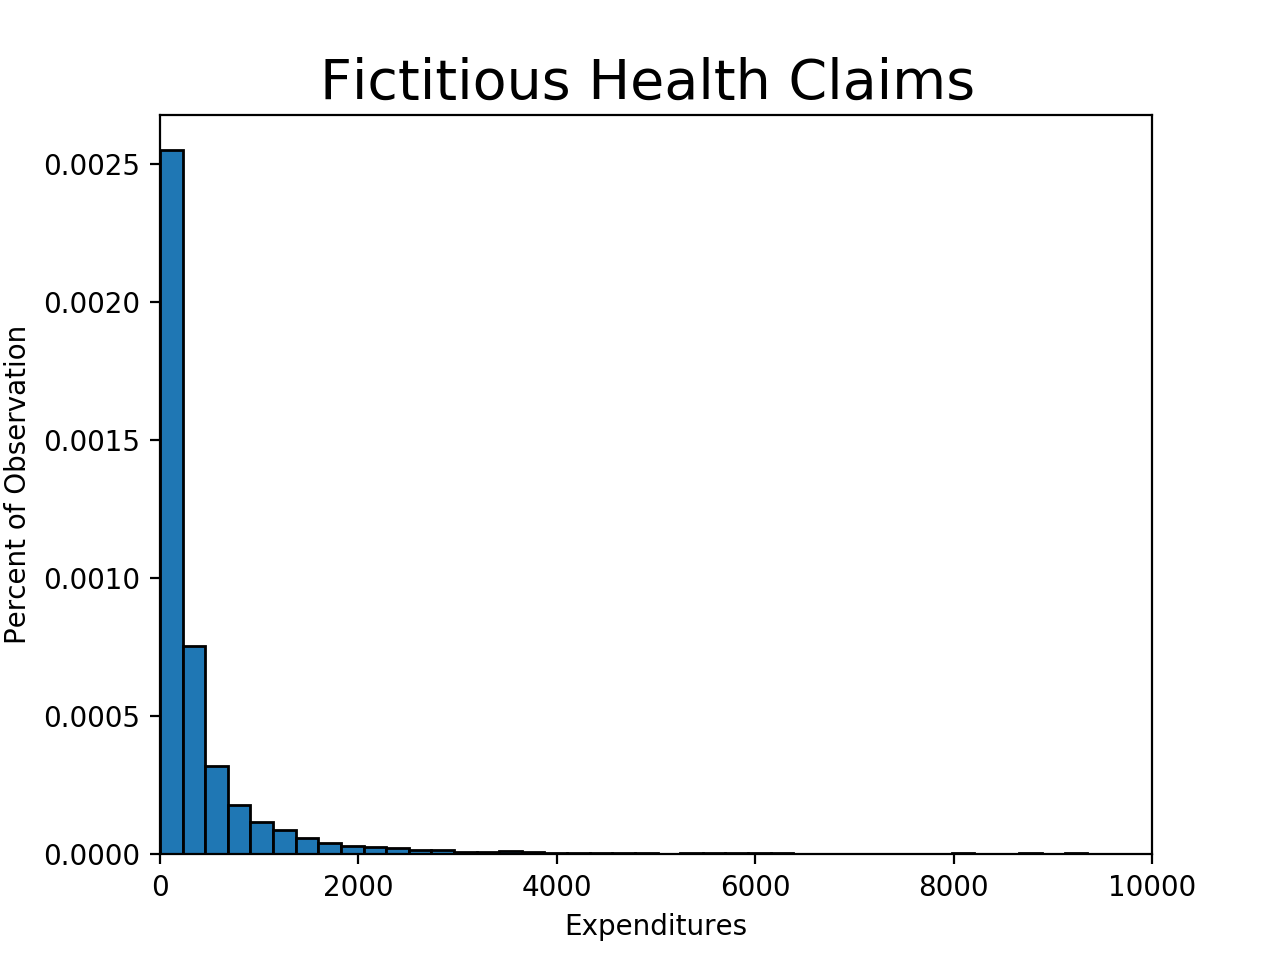

(0, 10000)

In [268]:
#1.a_2
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib notebook
count, bins, ignored = plt.hist(pts, 1000, edgecolor='black', normed=True)
plt.title('Fictitious Health Claims ', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([0, 10000])

<IPython.core.display.Javascript object>


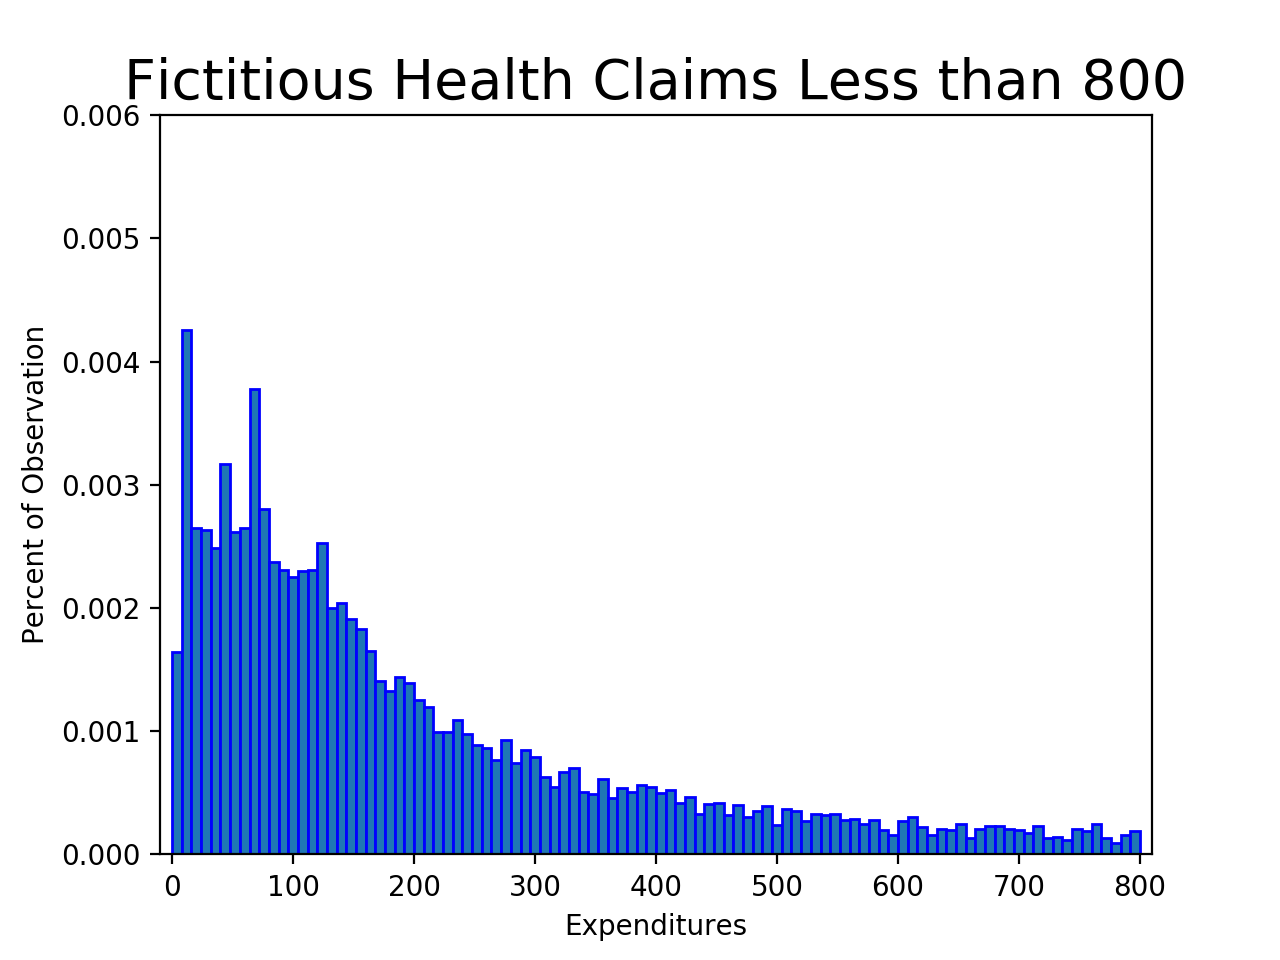

(0, 0.006)

In [269]:
#1.a_3
import matplotlib.pyplot as plt
%matplotlib notebook
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Fictitious Health Claims Less than 800', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])
#The reason that I might prefer the latter one is because the latter one focuses on the information that I desire the most.
#What I care about is the distributio for most of people, whose expdenditures are mostly below $800.
#I might not be interested to study for the extreme cases.

<IPython.core.display.Javascript object>


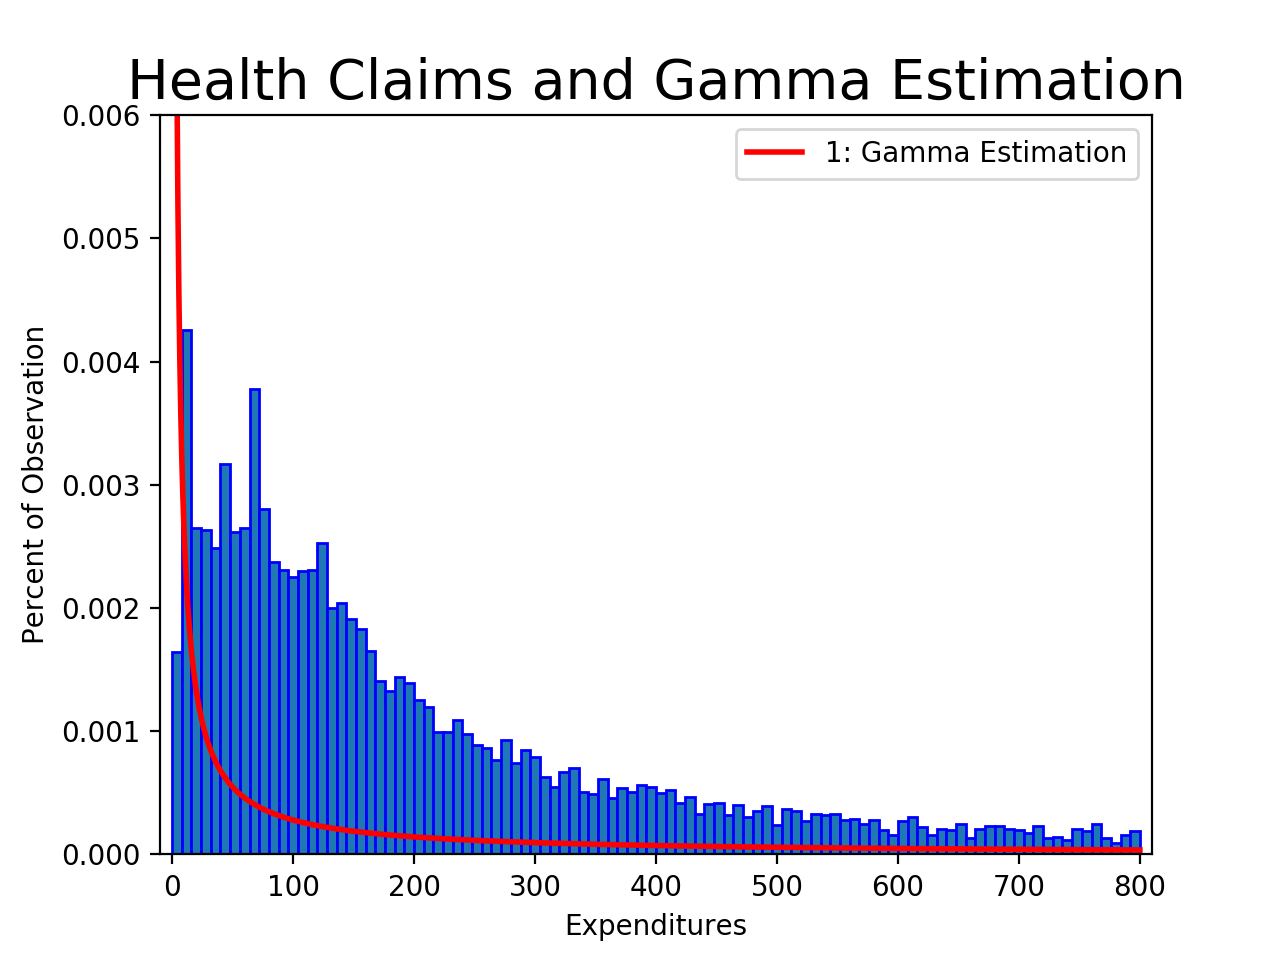

Log-likelihood 1:  -93555.3939035
alpha_MLE= 0.433884730938  beta_MLE= 1911.06461608


/Users/yhtsui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


      fun: 77795.057655211218
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01164153,  0.31723175])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 7
   status: 0
  success: True
        x: array([  4.33884731e-01,   1.91106462e+03])

In [270]:
#1.b
##Gamma Distribution
from scipy.special import gamma
import scipy.special as sps
import scipy.optimize as opt
import matplotlib.pyplot as plt

#Functions
def gamma_pdf(xvals,alpha,beta):
    pdf = xvals**(alpha-1) * (np.exp(-xvals/beta)) / (sps.gamma(alpha) * beta**alpha) 
    return pdf

def log_lik_gamma(xvals, a, b):
    pdf_vals = gamma_pdf(xvals, a , b)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gamma(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals,alpha,beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#Settings
mu = np.mean(pts)
var = np.var(pts)
beta = var/mu
alpha = mu/beta
m = 1

#Initial Guesses
alpha_init = alpha
beta_init = beta -20000
params1_init = np.array([alpha_init, beta_init])
mle_args = pts

#Plot
%matplotlib notebook
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Health Claims and Gamma Estimation', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])
dist_pts = np.linspace(0, 800, 1000)
plt.plot(dist_pts, gamma_pdf(dist_pts, alpha=alpha, beta=beta),linewidth=2, color='r',label='1: Gamma Estimation')
plt.legend(loc='upper right')

#Log-likelihood
print('Log-likelihood 1: ', log_lik_gamma(pts, alpha, beta))

#MLE-result
results1 = opt.minimize(crit_gamma, params1_init, args=(mle_args), method='L-BFGS-B', bounds=((1e-10, None),(1e-10, None)))
alpha1_MLE, beta1_MLE = results1.x
print('alpha_MLE=', alpha1_MLE, ' beta_MLE=', beta1_MLE)
results1

Log-likelihood 2:  -77795.0576552
alpha_MLE= 0.420443316923  beta_MLE= 1911.01275172 m_MLE= 0.836544199487


<IPython.core.display.Javascript object>


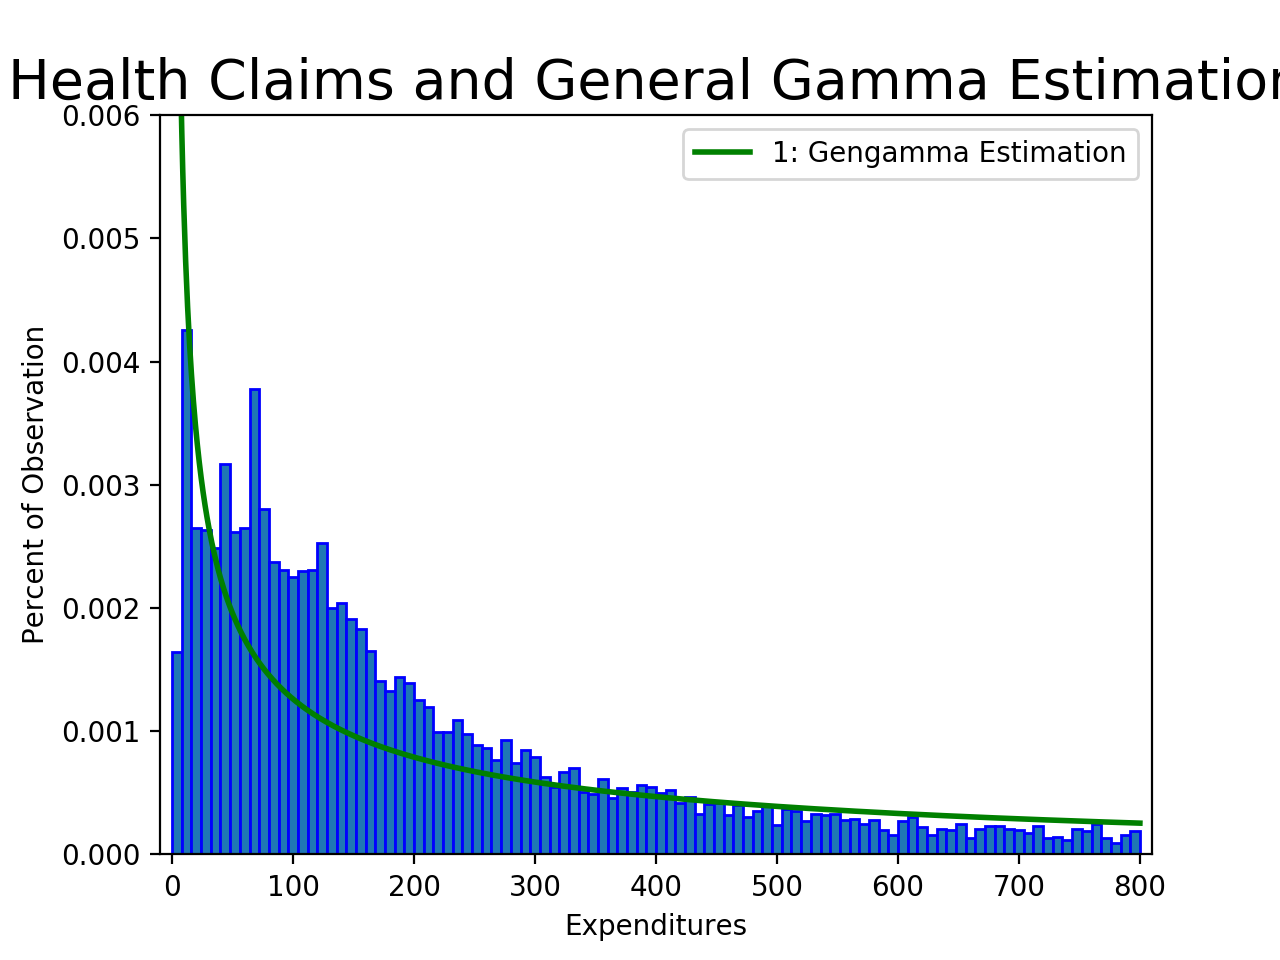

/Users/yhtsui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


      fun: 77564.223230185162
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.0349246 ,  0.6868504 , -0.22555469])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 4
   status: 0
  success: True
        x: array([  4.20443317e-01,   1.91101275e+03,   8.36544199e-01])

In [271]:
#1.c
##Generalized Gamma Distribution
from scipy.special import gamma
import scipy.special as sps
import scipy.optimize as opt
import matplotlib.pyplot as plt

#Functions
def gengamma_pdf(xvals,a,b,m):
    pdf2  = (m*(xvals**(a-1))*(np.exp(-(xvals/b)**m)))/((b**a)*sps.gamma(a/m))
    return pdf2

def log_lik_gengamma(xvals, alpha, beta, m):
    pdf_vals = gengamma_pdf(xvals, a=alpha, b=beta, m=m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gengamma(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gengamma(xvals,alpha, beta,m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#Initial Guesses from Part(b)
alpha_init = alpha1_MLE
beta_init = beta1_MLE
params2_init = np.array([alpha_init, beta_init,m])
mle_args = pts
m=1

#Log-likelihood
print('Log-likelihood 2: ', log_lik_gengamma(pts, alpha_init, beta_init,m))

#MLE-result
results2 = opt.minimize(crit_gengamma, params2_init, args=(mle_args), method='L-BFGS-B',bounds=((1e-10, None),(1e-10, None),(1e-10, None)))
alpha2_MLE, beta2_MLE, m2_MLE = results2.x
print('alpha_MLE=', alpha2_MLE, ' beta_MLE=', beta2_MLE, 'm_MLE=', m2_MLE)

#Plot
%matplotlib notebook
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Health Claims and General Gamma Estimation', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])
dist_pts = np.linspace(0, 800, 1000)
plt.plot(dist_pts, gengamma_pdf(dist_pts, a=alpha2_MLE, b=beta2_MLE, m=m_MLE),linewidth=2, color='g',label='1: Gengamma Estimation')
plt.legend(loc='upper right')

results2

Log-likelihood 3:  -77563.7964429
a_MLE= 0.75111262578  b_MLE= 115568634.745 p_MLE= 0.871799266992 q_MLE= 9999.9921832


<IPython.core.display.Javascript object>


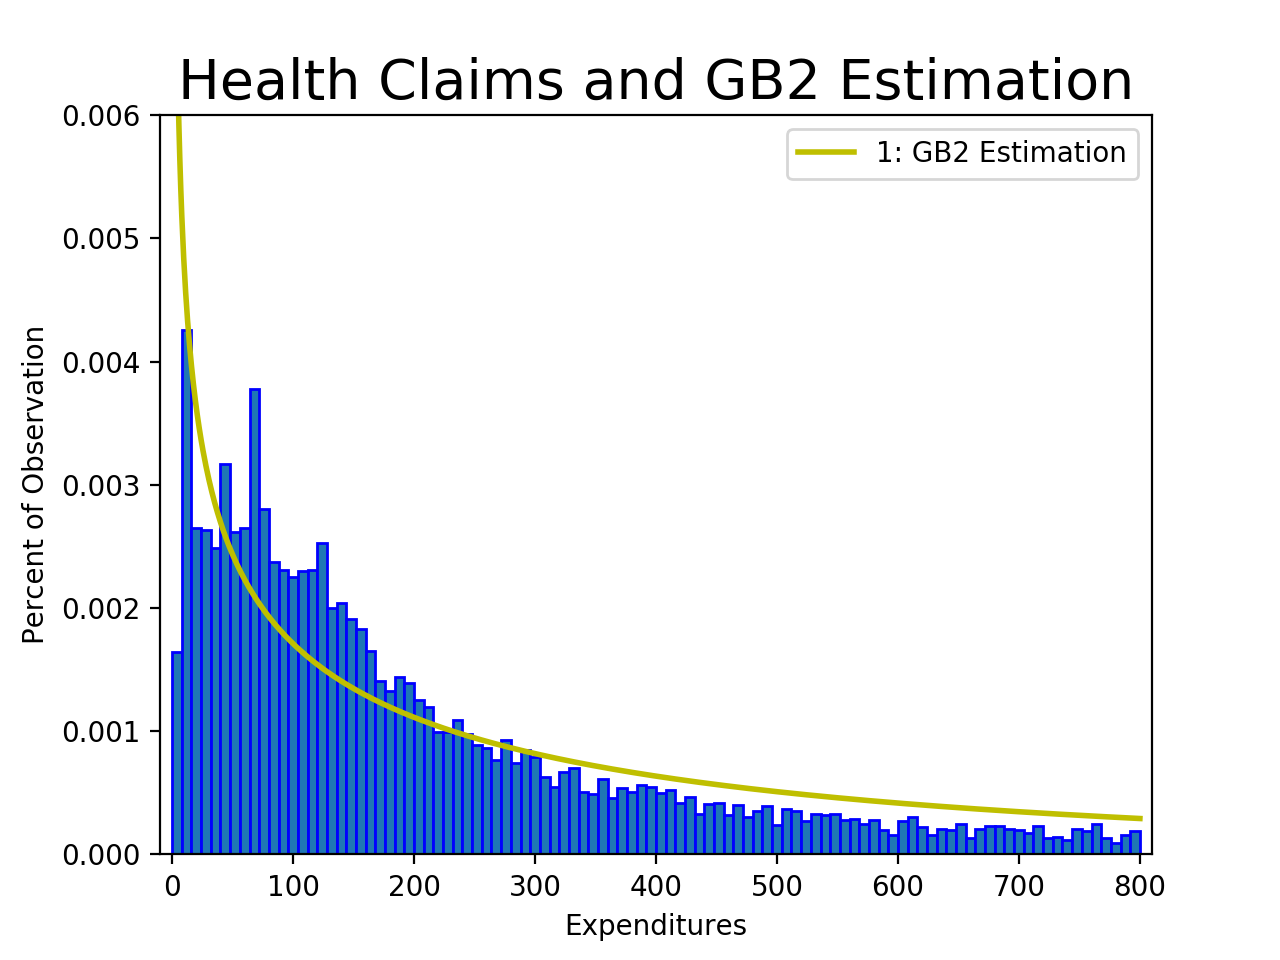

/Users/yhtsui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


      fun: 76671.122297291469
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 57.53390724,   0.        ,   9.80508048,   0.97061275])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 85
      nit: 10
   status: 0
  success: True
        x: array([  7.51112626e-01,   1.15568635e+08,   8.71799267e-01,
         9.99999218e+03])

In [272]:
#1.d
##Generalized Beta 2 Distribution
from scipy.special import beta
import scipy.special as sps
import scipy.optimize as opt
import matplotlib.pyplot as plt

#Functions
def gb2_pdf(xvals,a,b,p,q):
    pdf3 = a*xvals**(a*p-1)/(b**(a*p)*(1+(xvals/b)**a)**(p+q)*sps.beta(p,q))
    return pdf3

def log_lik_gb2(xvals, a, b, p, q):
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    log_pdf_vals = np.log(pdf_vals)
    log_lik_val = log_pdf_vals.sum()
    return log_lik_val

def crit_gb2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_gb2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#Initial Guesses from Part(c)
q=10000
a_init = m2_MLE
b_init = beta2_MLE*q**(1/m2_MLE) 
p_init = alpha2_MLE/m2_MLE 
params3_init = np.array([a_init, b_init,p_init,q])
mle_args = pts

#Log-likelihood
print('Log-likelihood 3: ', log_lik_gb2(pts, a= a_init, b=b_init,p=p_init,q=q))

#MLE-result
results3 = opt.minimize(crit_gb2, params3_init, args=(mle_args), method='L-BFGS-B',bounds=((1e-10, None),(1e-10, None),(1e-10, None),(1e-10, None)))
a_MLE, b_MLE, p_MLE, q_MLE = results3.x
print('a_MLE=', a_MLE, ' b_MLE=', b_MLE, 'p_MLE=', p_MLE, 'q_MLE=',q_MLE)

#Plot
%matplotlib notebook
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Health Claims and GB2 Estimation', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])
dist_pts = np.linspace(0, 800, 1000)
plt.plot(dist_pts, gb2_pdf(dist_pts, a=a_MLE, b=b_MLE , p=p_MLE,q=q_MLE),linewidth=2, color='y',label='1: GB2 Estimation')
plt.legend(loc='upper right')

results3

In [273]:
#1.e
## Likelihood Ratio Tests
lrgamma = 2 * (log_lik_gb2(pts, a=a_MLE, b=b_MLE , p=p_MLE,q=q_MLE) - log_lik_gamma(pts, a=alpha2_MLE, b=beta2_MLE))
lrgengamma = 2 * (log_lik_gb2(pts, a=a_MLE, b=b_MLE , p=p_MLE,q=q_MLE) - log_lik_gengamma(pts, alpha=alpha2_MLE, beta=beta2_MLE,m=1))
print('Likelihood Ratio for Gamma:', lrgamma)
print('Likelihood Ratio for Generalized Gamma:', lrgengamma)

Likelihood Ratio for Gamma: 2260.16552108
Likelihood Ratio for Generalized Gamma: 2260.16552108


In [274]:
#1.f
# Probability Calculation
from scipy.integrate import quad
def integrand1(x):
    return gb2_pdf(x, a=a_MLE, b=b_MLE, p=p_MLE, q=q_MLE)
def integrand2(x):
    return gamma_pdf(x, alpha=alpha1_MLE, beta=beta1_MLE)
prob1 = quad(integrand1,0, 1000)
prob2 = quad(integrand2,0, 1000)
print('Probability above $1000 GB2 = ', 1-prob1[0])
print('Probability above $1000 Gamma = ', 1-prob2[0])
#From the results we obtain, it is not less likely to have a health claim over $1,000 with GB2 distribution.
#The probability of having claims over $1,000 increases when we use Gamma distribution.


Probability above $1000 GB2 =  0.16932360419301862
Probability above $1000 Gamma =  0.2642428915269347
